Current Plot: guacamole
Time interval: 0/2
Position: [0, 0, 0]
-------------------------
None
Current Plot: guacamole
Time interval: 1/3
Position: [-743, 0, 36]
-------------------------
None
Current Plot: guacamole
Time interval: 2/4
Position: [-558, 0, 36]
-------------------------
None
Current Plot: guacamole
Time interval: 3/5
Position: [-622, 0, 25]
-------------------------
None
Current Plot: guacamole
Time interval: 4/6
Position: [-546, 0, 24]
-------------------------
None
Current Plot: guacamole
Time interval: 5/7
Position: [-968, 0, 39]
-------------------------
None
Current Plot: guacamole
Time interval: 6/8
Position: [-860, 0, 34]
-------------------------
None
Current Plot: guacamole
Time interval: 7/9
Position: [-801, 0, 30]
-------------------------
None
Current Plot: guacamole
Time interval: 8/10
Position: [-708, 0, 42]
-------------------------
None
Current Plot: guacamole
Time interval: 9/11
Position: [-533, 0, 10]
-------------------------
None
Current Plot: guacamol

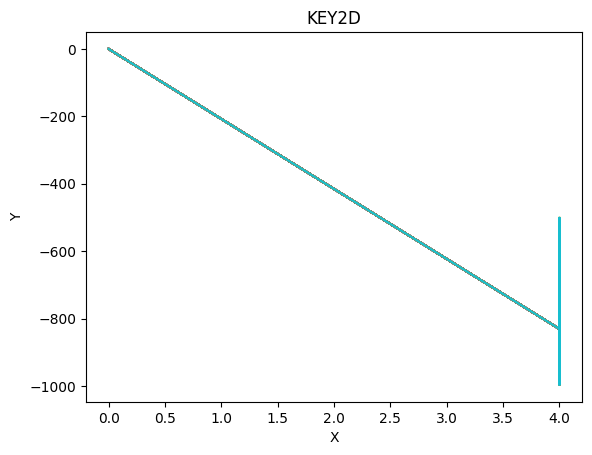

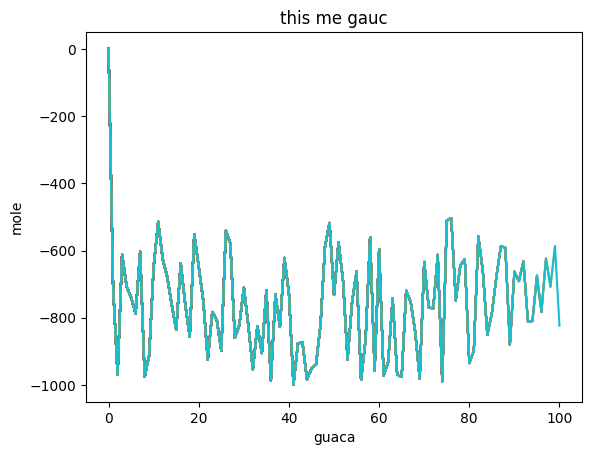

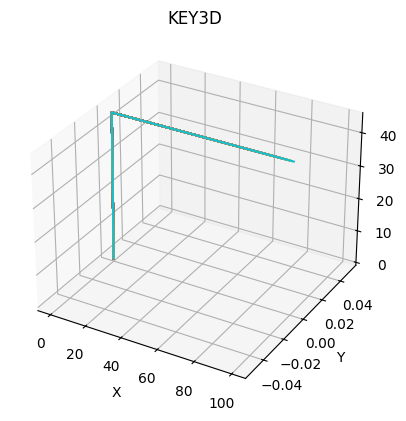

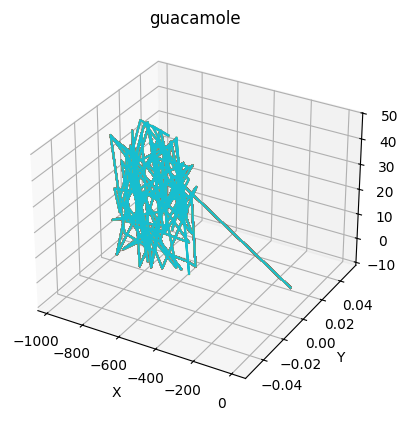

In [39]:
import sys
if not ('numpy' in sys.modules and 'matplotlib' in sys.modules):
    !{sys.executable} -m pip install numpy
    !{sys.executable} -m pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt 
import random
import time 

plt.ion() #Interactive ON

plotID = 0
plotDict = {}
interval = 1

#Plot Object Class
class plotObject:
    key = ""
    storedID = 0
    figData = [[0], [0]]
    projection_3d: bool

    #Initialization
    def __init__(self, key: str, projection_3d, x_axis, y_axis, z_axis, title):
        global plotID
        global plotDict
        plotID += 1
        self.storedID = plotID
        self.projection_3d = projection_3d
        self.key = key
        if not projection_3d:
            self.figData = [[0], [0]]
            fig2D = plt.figure(plotID)
        else:
            self.figData = [[0], [0], [0]]
            fig3D = plt.figure(plotID).add_subplot(projection='3d')
            fig3D.set_zlabel(z_axis)
        plt.xlabel(x_axis)
        plt.ylabel(y_axis)
        plt.title(title)
        plotDict[key] = self

    #Default 2D Graph Declaration
    def default2D(key: str): 
        return plotObject(key, False, "X", "Y", "", key)
    
    #Default 3D Graph Declaration
    def default3D(key: str): 
        return plotObject(key, True, "X", "Y", "Z", key)

    #Get size
    def getDataSize(self):
        figDataSize = len(self.figData[0])
        return figDataSize
    
    #Getter
    def getDataAtTime(self, time: int):
        timeData = []
        timeData.append(self.figData[0][time])
        timeData.append(self.figData[1][time])
        if self.projection_3d:
            timeData.append(self.figData[2][time])
        return timeData
    
    #Full report
    def reportAtTime(self, time: int):
        print("Current Plot: " + self.key)
        print("Time interval: " + str(time) + "/" + str(self.getDataSize()))
        print("Position: " + str(self.getDataAtTime(time)))
        print("-------------------------")


#Get object out of plotDict
def plotAt(key: str):
    return (plotDict[key])


# Tick, updates a graph
# Dynamically adpatable with optional x, y, and z inputs 
def tick(key, x = None, y = None, z = None):
    figureID = plotAt(key).storedID
    data = plotAt(key).figData
    projection_3d = plotAt(key).projection_3d
    plt.figure(figureID)

    # X Inputs
    if x != None:
        data[0].append(x) #Y-Data (The actual data)
    else:
        prev_time = data[0][len(plotAt(key).figData[0])-1] #Log previous time
        data[0].append(prev_time + interval) #X-Data (Previous time + tick interval)
    
    # Y Inputs
    if y != None:
        data[1].append(y) #Y
    else: 
        data[1].append(0)

    # Z Inputs
    if z != None:
        data[2].append(z) #Z
    else:
        if projection_3d == True:
            data[2].append(0)
    
    # Final report
    if projection_3d == False:
        plt.plot(data[0], data[1]) 
    else:
        plt.plot(data[0], data[1], data[2]) 


#Test stuff
plotObject.default2D("KEY2D")
plotObject("KEY2D2", False, "guaca", "mole", "", "this me gauc")
plotObject.default3D("KEY3D")
plotObject.default3D("guacamole")

for i in range(100):
    tick("KEY2D", x=4, y=random.randrange(-1000, -500))
    tick("KEY2D2", y=random.randrange(-1000, -500))
    tick("KEY3D", z=45)
    tick("guacamole", x=random.randrange(-1000, -500), z=random.randrange(-10, 50))
    print(plotAt("guacamole").reportAtTime(i))
